Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accuratel

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
# Attempt to read the CSV with 'ISO-8859-1' encoding
try:
    data = pd.read_csv('/content/IMDb_Movies_India[1].csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    print("Failed to read the file with 'ISO-8859-1' encoding.")
    # Optionally, you can try another encoding such as 'latin1'
    data = pd.read_csv('/content/IMDb_Movies_India[1].csv', encoding='latin1')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

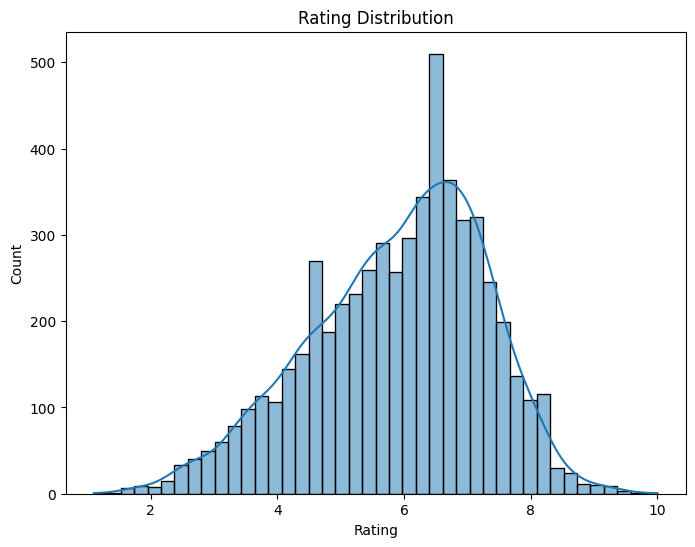

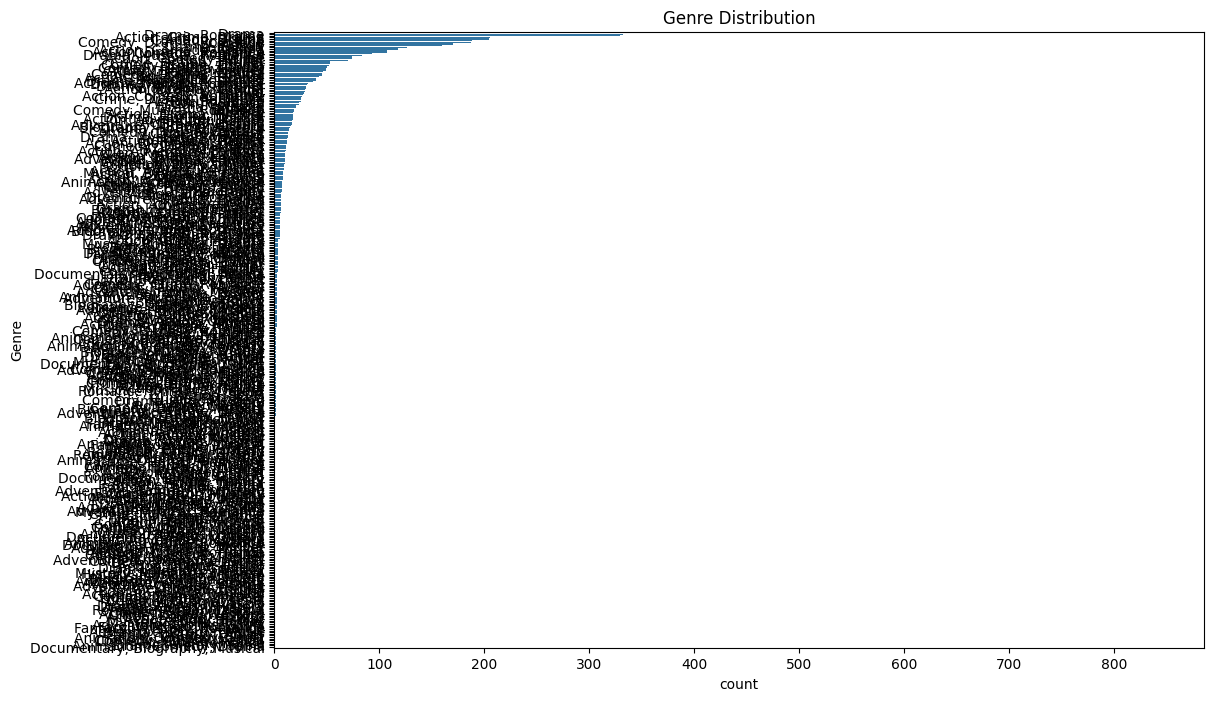

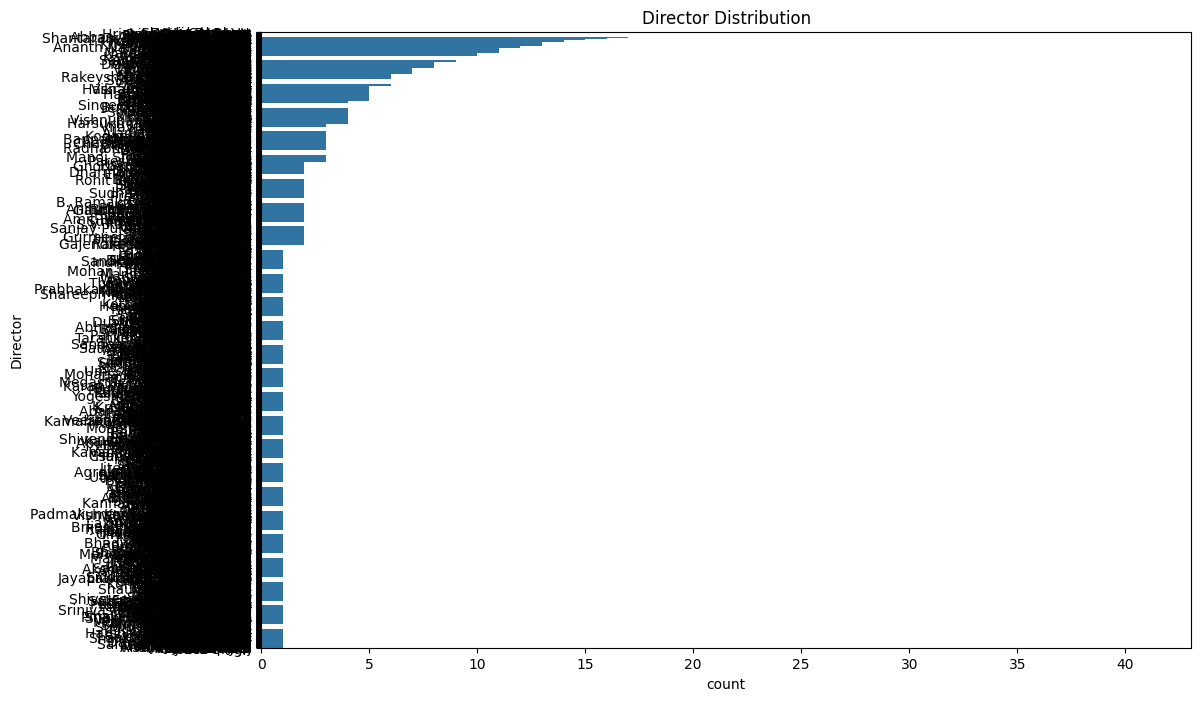

In [28]:
# Distribution of the target variable 'rating'
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], kde=True)
plt.title('Rating Distribution')
plt.show()

# Countplot of 'genre'
plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index)
plt.title('Genre Distribution')
plt.show()

# Countplot of 'director'
plt.figure(figsize=(12, 8))
sns.countplot(y='Director', data=data, order=data['Director'].value_counts().index)
plt.title('Director Distribution')
plt.show()



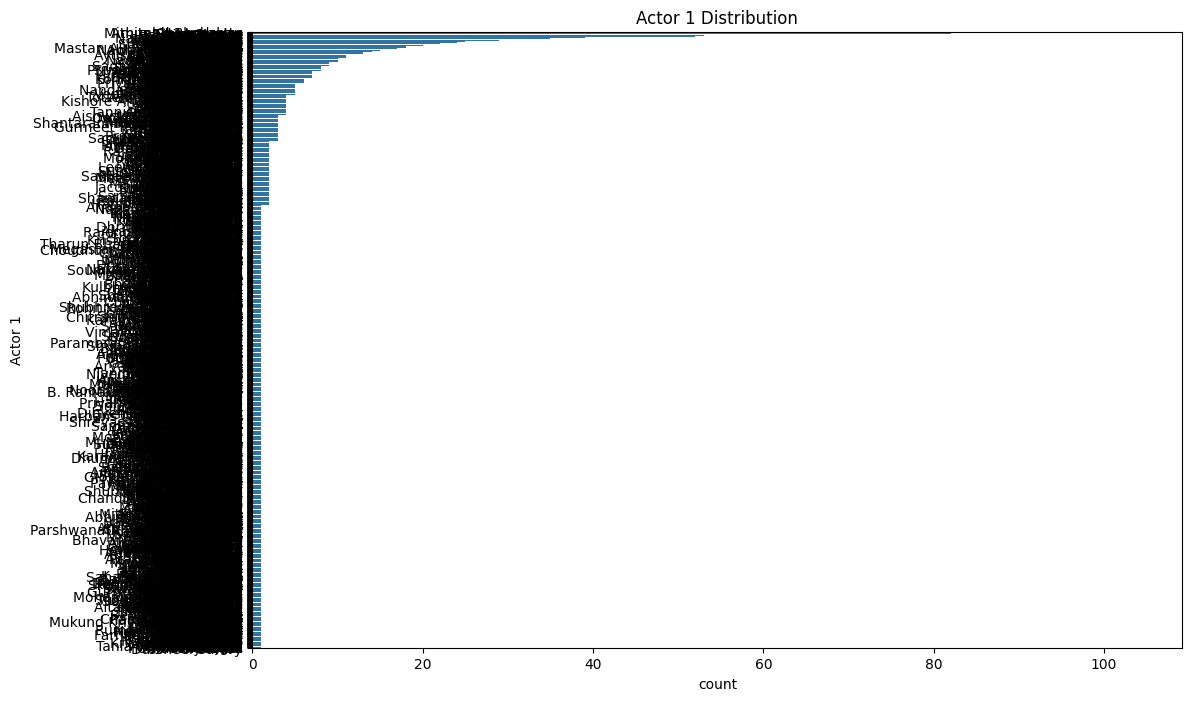

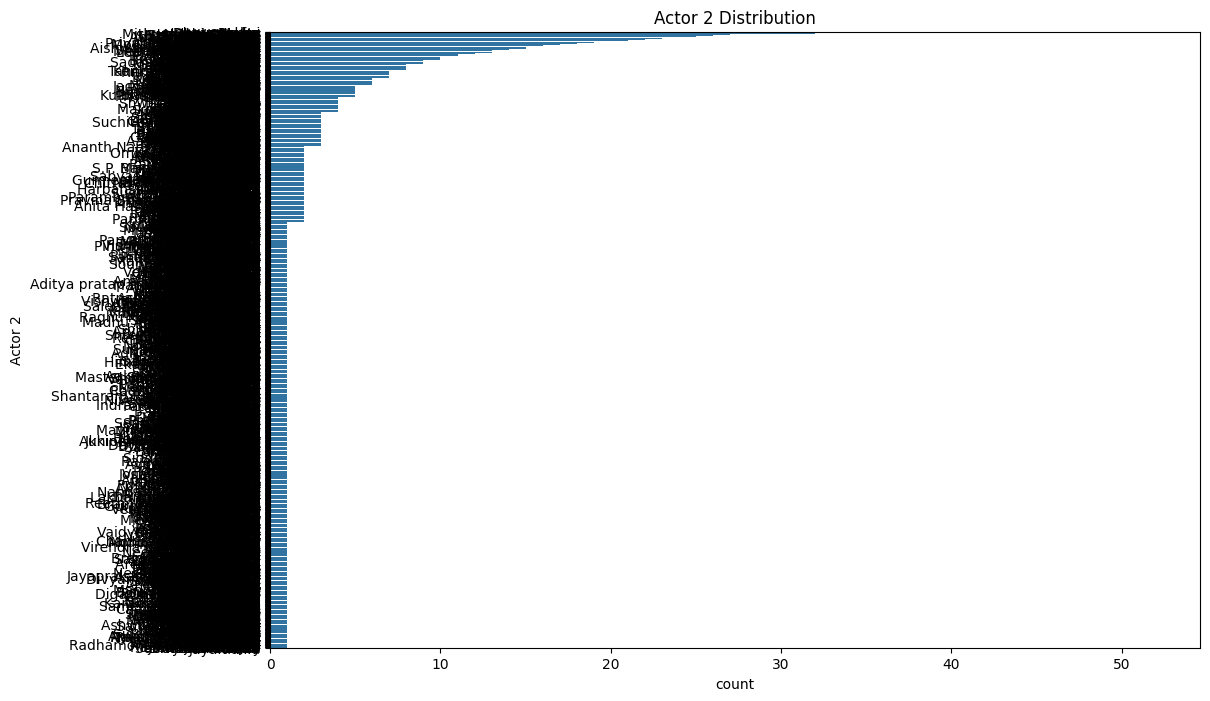

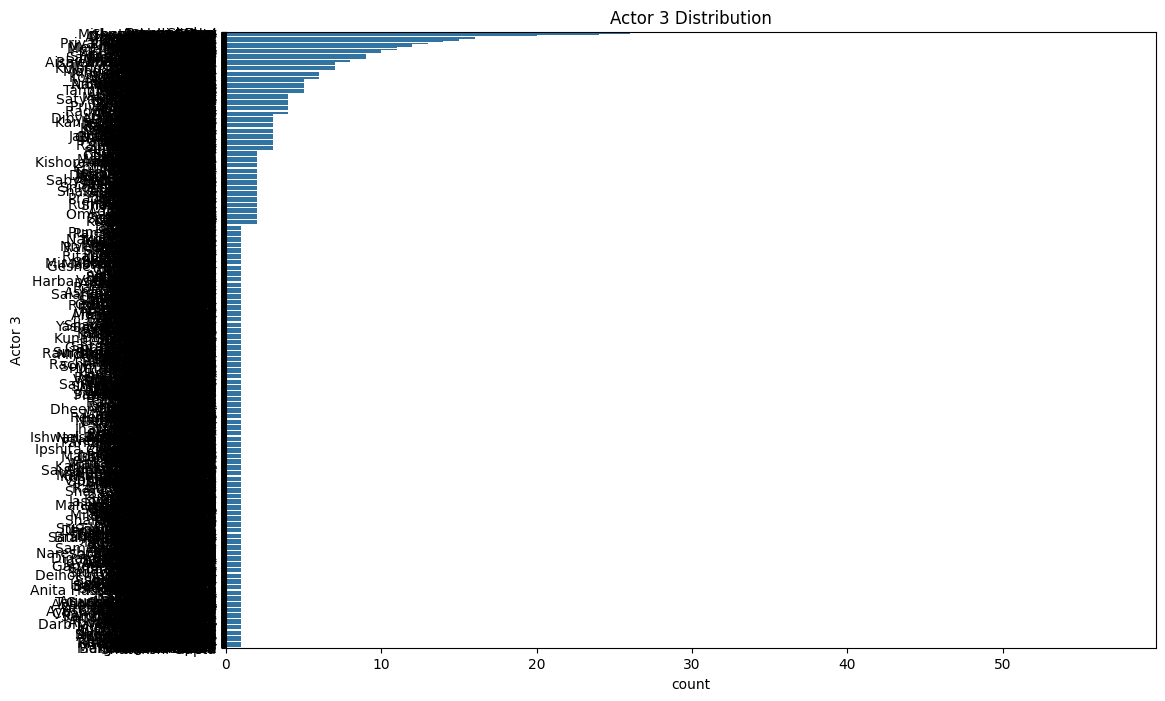

In [27]:
# Countplot of 'actors'
plt.figure(figsize=(12, 8))
sns.countplot(y='Actor 1', data=data, order=data['Actor 1'].value_counts().index)
plt.title('Actor 1 Distribution')
plt.show()

# Countplot of 'actors'
plt.figure(figsize=(12, 8))
sns.countplot(y='Actor 2', data=data, order=data['Actor 2'].value_counts().index)
plt.title('Actor 2 Distribution')
plt.show()

# Countplot of 'actors'
plt.figure(figsize=(12, 8))
sns.countplot(y='Actor 3', data=data, order=data['Actor 3'].value_counts().index)
plt.title('Actor 3 Distribution')
plt.show()

In [29]:
# Fill missing values
data['Genre'].fillna('Unknown', inplace=True)
data['Director'].fillna('Unknown', inplace=True)
data['Actor 1'].fillna('Unknown', inplace=True)
data['Actor 2'].fillna('Unknown', inplace=True)
data['Actor 3'].fillna('Unknown', inplace=True)
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

# Drop rows with missing values in other features if any
data.dropna(inplace=True)

# Display missing values count again
print(data.isnull().sum())


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [33]:
# Define features and target
X = data[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
y = data['Rating']

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('Genre', OneHotEncoder(handle_unknown='ignore'), ['Genre']),
        ('Director', OneHotEncoder(handle_unknown='ignore'), ['Director']),
        ('Actor 1', OneHotEncoder(handle_unknown='ignore'), ['Actor 1']),
        ('Actor 2', OneHotEncoder(handle_unknown='ignore'), ['Actor 2']),
        ('Actor 3', OneHotEncoder(handle_unknown='ignore'), ['Actor 3'])
    ]
)

# Create a pipeline with preprocessor and regression models
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler', StandardScaler(with_mean=False)),
                              ('regressor', LinearRegression())])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler', StandardScaler(with_mean=False)),
                              ('regressor', RandomForestRegressor())])

pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('scaler', StandardScaler(with_mean=False)),
                                 ('regressor', Ridge())])


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
pipeline_lr.fit(X_train, y_train)

# Train Random Forest model
pipeline_rf.fit(X_train, y_train)

# Train Ridge Regression model
pipeline_ridge.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Genre',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre']),
                                                 ('Director',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Director']),
                                                 ('Actor 1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Actor 1']),
                                                 ('Actor 2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Actor 2']),
                                                 ('Actor 3',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Actor 3'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('regressor', Ridge())])

Linear Regression
Mean Squared Error: 11.869483266130624
R-squared: -5.958839139967091


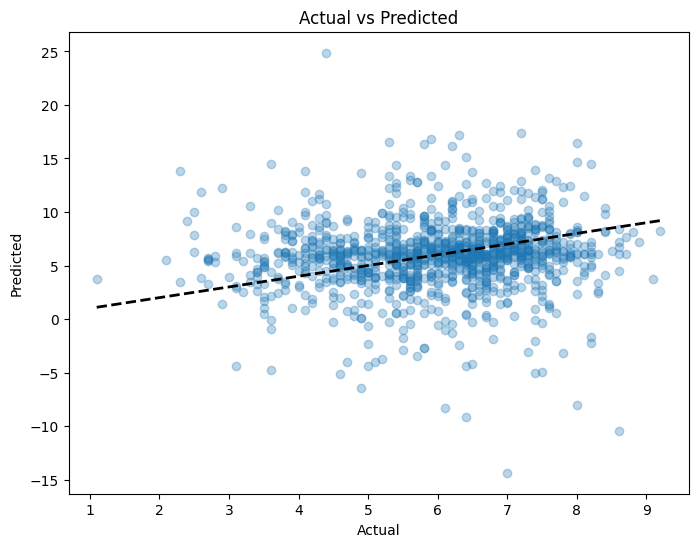

Random Forest
Mean Squared Error: 1.481562055149385
R-squared: 0.13138998669951363


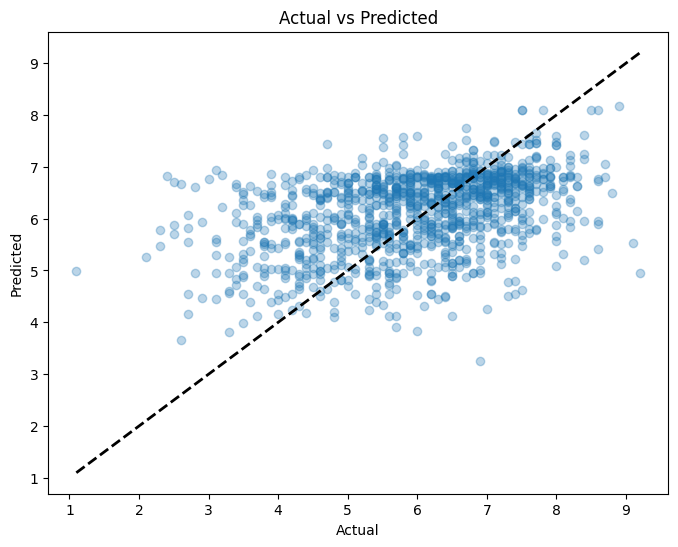

Ridge Regression
Mean Squared Error: 7.579651143192024
R-squared: -3.4437969084172


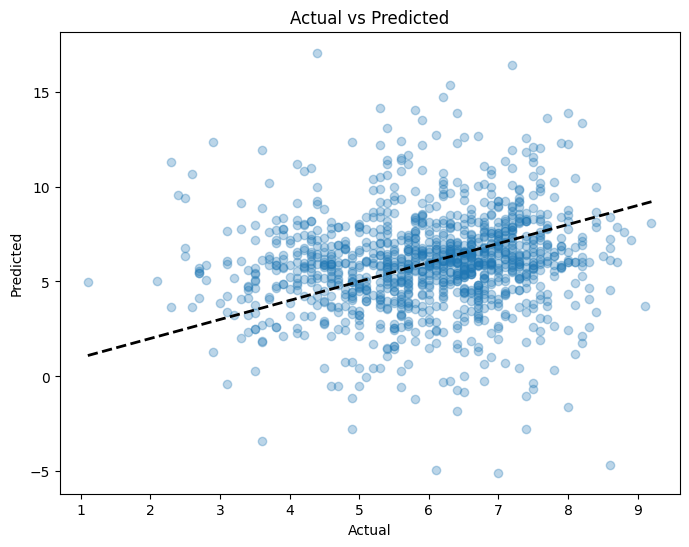

In [35]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()

# Evaluate Linear Regression model
print("Linear Regression")
evaluate_model(pipeline_lr, X_test, y_test)

# Evaluate Random Forest model
print("Random Forest")
evaluate_model(pipeline_rf, X_test, y_test)

# Evaluate Ridge Regression model
print("Ridge Regression")
evaluate_model(pipeline_ridge, X_test, y_test)
